In [47]:
#Installing PRAW: A Guide to Accessing Reddit's API
pip install praw


SyntaxError: invalid syntax (2962439117.py, line 2)

In [ ]:
#Reddit API Authentication

In [ ]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="Hv5lnPVXbNT1Izgi74bz5Q",
    client_secret="cy7hWmkO_idXrneZP_3k6YGx_JQIvw",
    user_agent=user_agent
)

In [ ]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [ ]:
#New rising topics on selected word

In [ ]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("India").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

In [ ]:
#Selecting headlines of subreddits on selected topic

In [ ]:
headlines = set()
for submission in reddit.subreddit("India").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

In [ ]:
#Creating dataset

In [48]:
#Create a dataframe from the scrapped data 
India_df = pd.DataFrame(headlines)
India_df.head()

,0
0,Is it time to leave?
1,Glaciers melting at unprecedented rates in In...
2,Confused about a prescribed Medicine
3,"After Supreme Court rap, Patanjali issues anot..."
4,Disappearing Messages: WhatsApp Says Will Leav...


In [49]:
India_df.columns

RangeIndex(start=0, stop=1, step=1)

In [50]:
India_df.columns = ['Titles']

In [51]:
India_df.head()

,Titles
0,Is it time to leave?
1,Glaciers melting at unprecedented rates in In...
2,Confused about a prescribed Medicine
3,"After Supreme Court rap, Patanjali issues anot..."
4,Disappearing Messages: WhatsApp Says Will Leav...


In [52]:
India_df.Titles.duplicated().sum() 

0

In [53]:
#Cleaning headlines

In [54]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
India_df["Titles"]= India_df["Titles"].apply(cleanTxt)

#Show the clean text
India_df.head()

,Titles
0,Is it time to leave?
1,Glaciers melting at unprecedented rates in In...
2,Confused about a prescribed Medicine
3,"After Supreme Court rap, Patanjali issues anot..."
4,Disappearing Messages WhatsApp Says Will Leave...


In [55]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
India_df["Titles"]= India_df["Titles"].apply(remove_emoji)

#Show the clean text
India_df.head()

,Titles
0,Is it time to leave?
1,Glaciers melting at unprecedented rates in In...
2,Confused about a prescribed Medicine
3,"After Supreme Court rap, Patanjali issues anot..."
4,Disappearing Messages WhatsApp Says Will Leave...


In [56]:

!pip install textblob

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.11/site-packages/jsonpointer-2.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [57]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [58]:
#Getting polarity and insight

In [59]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
India_df['Subjectivity'] = India_df['Titles'].apply(getSubjectivity)
India_df['Polarity'] = India_df['Titles'].apply(getPolarity)

#Now display data
India_df.head()

,Titles,Subjectivity,Polarity
0,Is it time to leave?,0.000000,0.0
1,Glaciers melting at unprecedented rates in In...,0.900000,0.6
2,Confused about a prescribed Medicine,0.700000,-0.4
3,"After Supreme Court rap, Patanjali issues anot...",0.283333,0.0
4,Disappearing Messages WhatsApp Says Will Leave...,0.200000,-0.3


In [60]:
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
India_df["Insight"] = India_df["Polarity"].apply(getInsight)

India_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Is it time to leave?,0.000000,0.000000,Neutral
1,Glaciers melting at unprecedented rates in In...,0.900000,0.600000,Positive
2,Confused about a prescribed Medicine,0.700000,-0.400000,Negative
3,"After Supreme Court rap, Patanjali issues anot...",0.283333,0.000000,Neutral
4,Disappearing Messages WhatsApp Says Will Leave...,0.200000,-0.300000,Negative
5,Uber Responds About Emergency Button After Use...,0.100000,0.000000,Neutral
6,The Mumbai Press Club strongly condemns the th...,0.711111,0.111111,Positive
7,D Gukesh becomes youngest man to win Candidate...,0.400000,0.800000,Positive
8,'Spiderman couple' arrested after video of 'Ti...,0.000000,0.000000,Neutral
9,Pat Cummins' favourite memory of Virat Kohli w...,1.000000,0.800000,Positive


In [61]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [62]:
#Getting polarity and insight

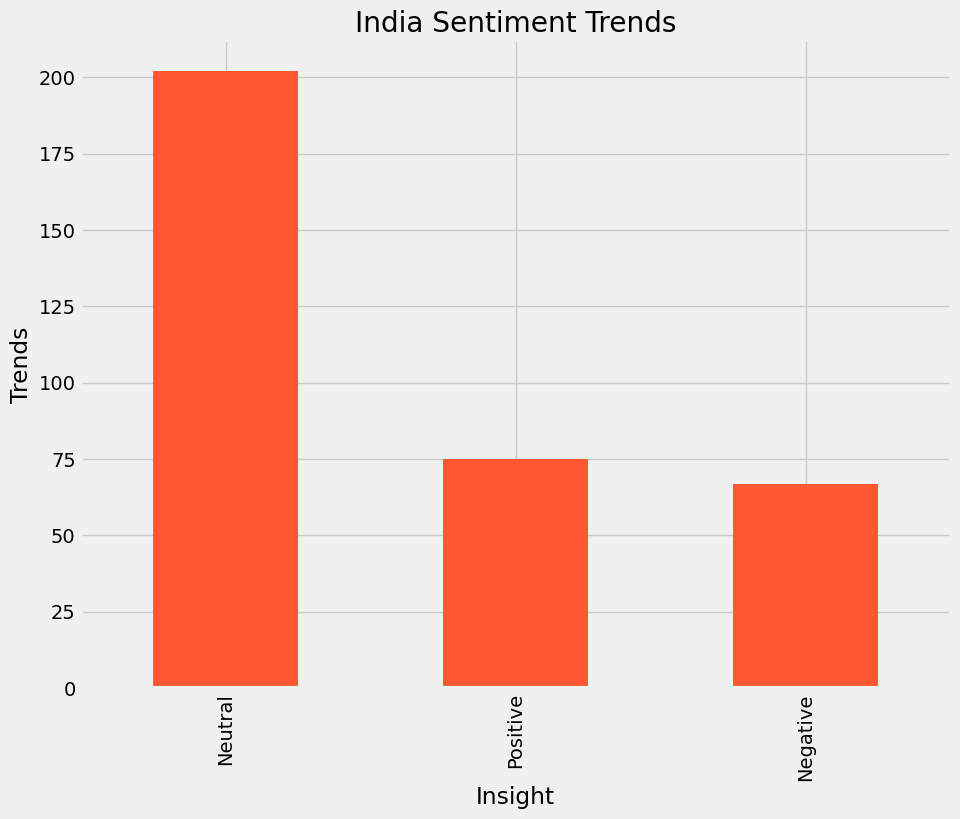

In [63]:
#Plot the values count of sentiment
# Plot the values count of sentiment
plt.title("India Sentiment Trends")
plt.xlabel("Sentiment")
plt.ylabel("Trends")
plt.rcParams["figure.figsize"] = (10,8)
India_df["Insight"].value_counts().plot(kind="bar", color="#FF5733")
plt.show()


In [64]:
#Creating WordCloud

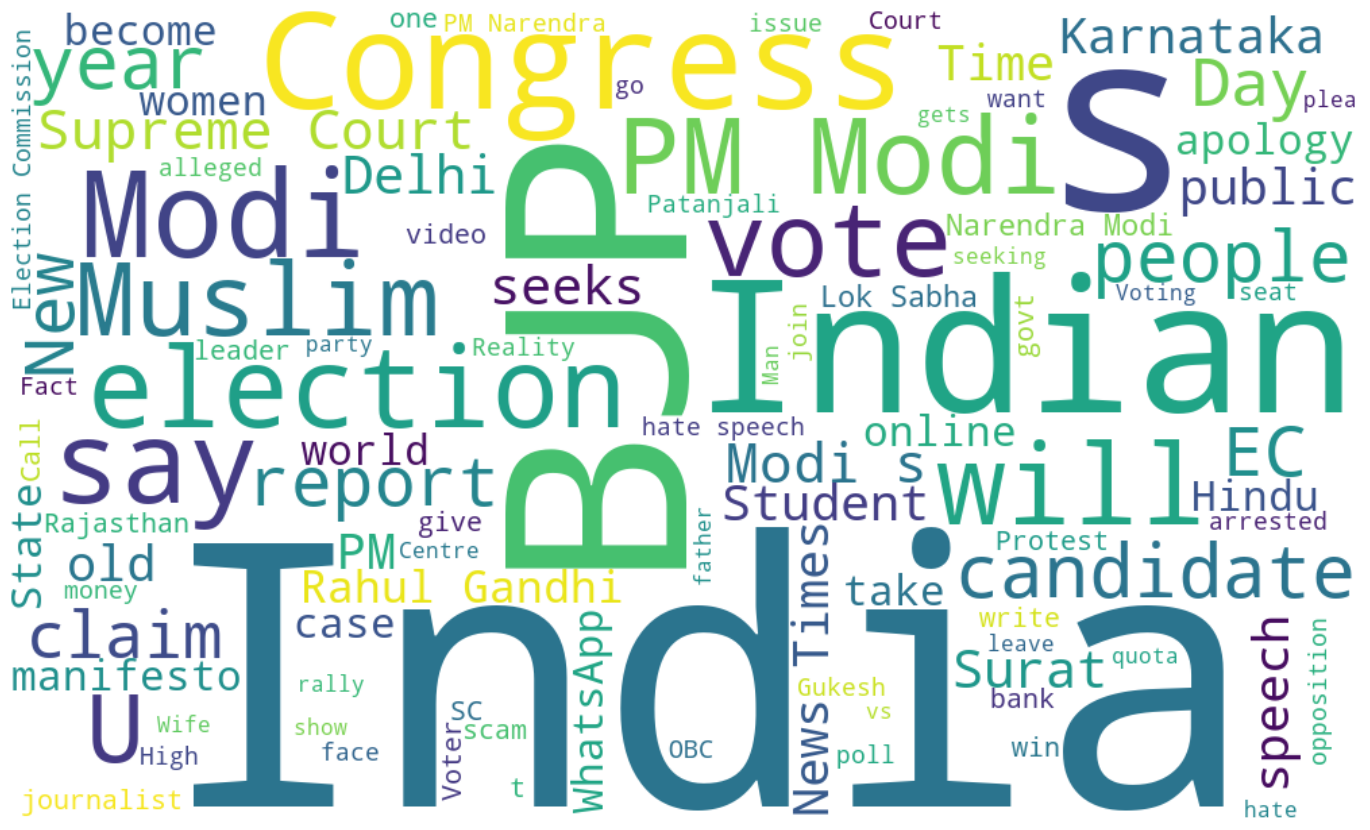

In [65]:
# Concatenate all titles into a single string
text = ' '.join([title for title in India_df['Titles']])

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600,
                      max_words=100,
                      stopwords=STOPWORDS,
                      background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(20,10), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
